## Workshop 4

### Visualization

#### Basic Plots

We begin with three univariate visualizations: histograms, boxplots and bar plots.

<b>Histogram</b>

We want to display our graphics on our stdout device (screen) so we must tell jupyter that is what we want to do. This is done with an Ipython (aka jupyter) command called a "magic command". Magic commands begin with a % symbol and are directed at controlling something in the jupyter notebook, in this case the display of plots on the current screen.

In [1]:
%matplotlib inline

The matplotlib and pandas modules contain methods that make most plotting tasks very easy.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10) #Change the figure size to see larger plots than the default


Read a file into our python session.

In [3]:
iris = pd.read_csv('C:/Users/Tim/Google Drive/SMU/ITOM 6267 Data Mining MSBA/data/iris.csv', index_col=0)

In [4]:
iris.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


Extract the rows for versicolor only.

In [5]:
irisVersicolor = iris.loc[iris.species == 'versicolor', :]
irisVersicolor.head()
print(type(irisVersicolor))

<class 'pandas.core.frame.DataFrame'>


In [6]:
irisVersicolor.sepalLength.agg(['count', 'mean', 'median', 'std', 'skew', 'kurtosis'])

count       50.000000
mean         5.936000
median       5.900000
std          0.516171
skew         0.105378
kurtosis    -0.533010
Name: sepalLength, dtype: float64

We can see from these statistics that the sepalLength distribution is symetric and that there are no outliers. So let's see what it looks like in a histogram.

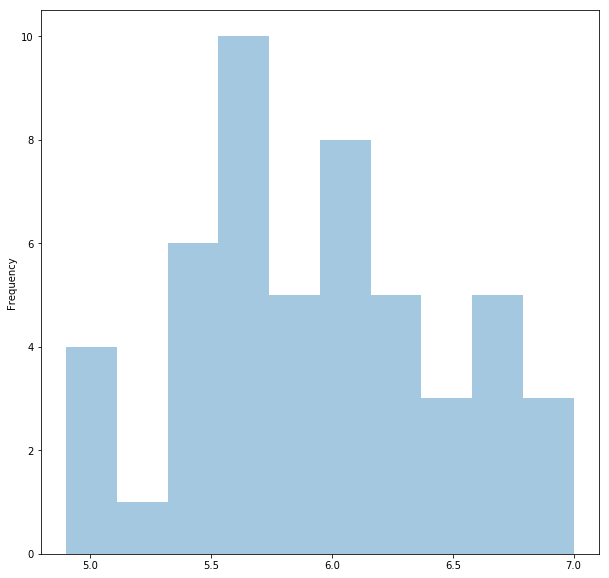

In [7]:
irisVersicolor.sepalLength.plot.hist(alpha=.4) # alpha controls the transparency of the bars (0=transparent, 1=opaque)

Change the number of bins.

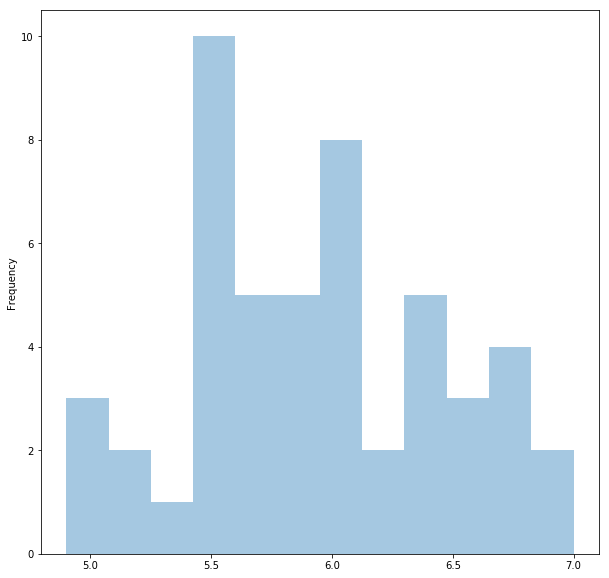

In [8]:
irisVersicolor.sepalLength.plot.hist(alpha=.4, bins=12)

Turn it on its side.

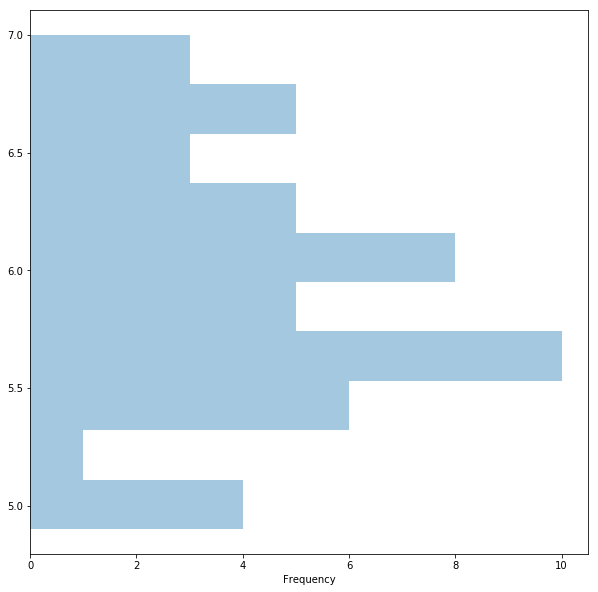

In [9]:
irisVersicolor.sepalLength.plot.hist(alpha=.4, orientation='horizontal')

#### Boxplots

Another way to depict this is with a boxplot.

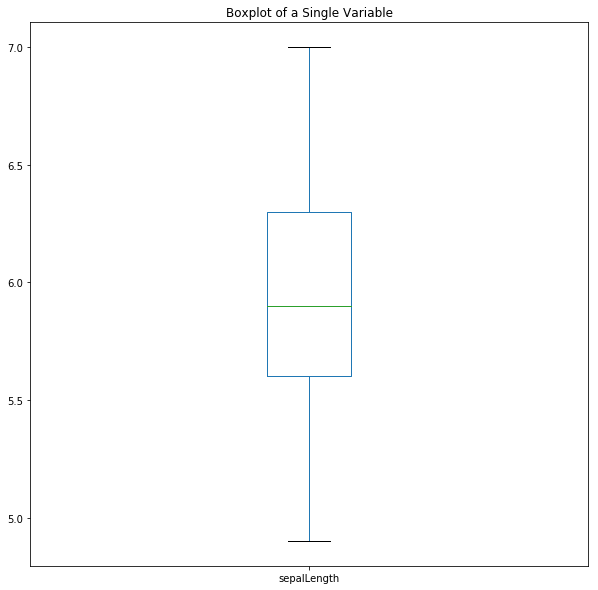

In [10]:
irisVersicolor.sepalLength.plot.box()
plt.title('Boxplot of a Single Variable')

This too can be oriented on its side.

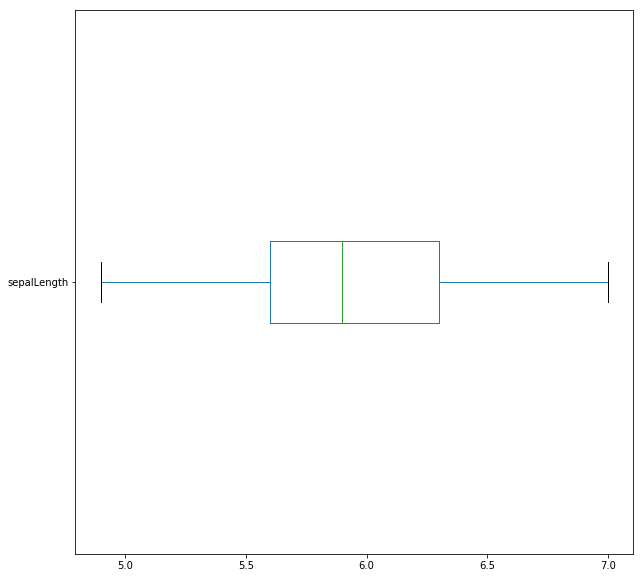

In [11]:
irisVersicolor.sepalLength.plot.box(vert=False)

Things get a little more interesting when we include multiple columns. Here we compare the distributions of all the numeric columns in the irisVersicolor dataFrame

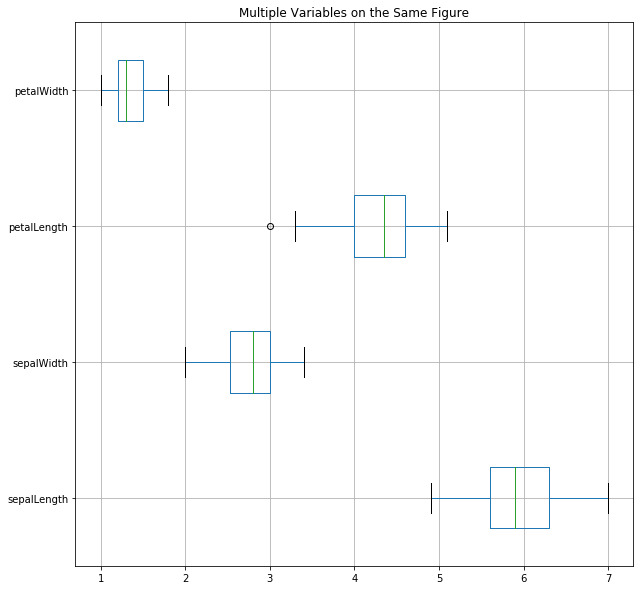

In [12]:
plt.title("Multiple Variables on the Same Figure")
irisVersicolor.boxplot(vert=False)

Oh oh, we may have a case of "severe grid" on our hands, so lets turn it off.

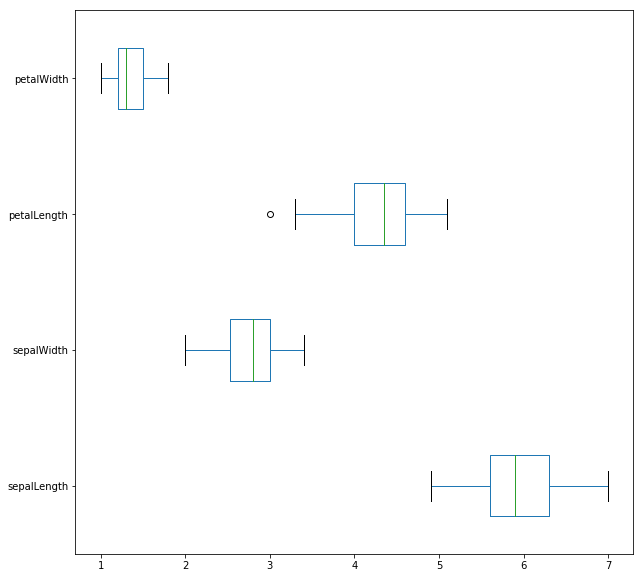

In [13]:
irisVersicolor.boxplot(vert=False, grid=False)

##### Slice and dice: groupby

Lets see how to compare distributions that are grouped by some categorical variable such as <i>species</i>.

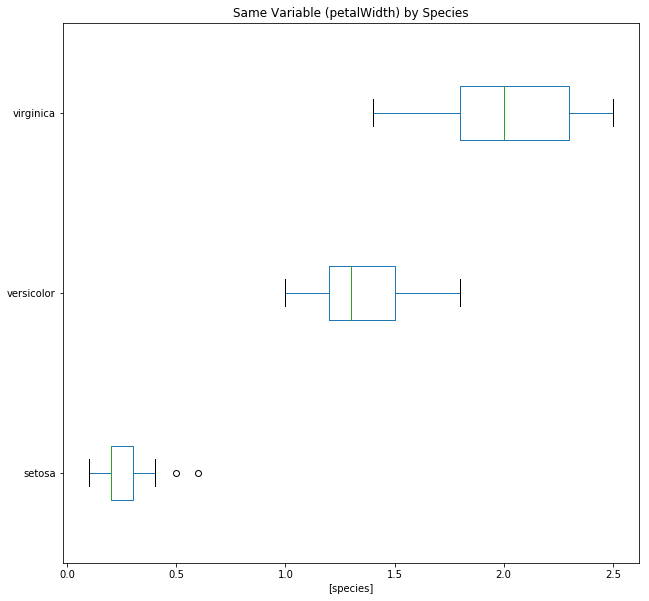

In [14]:
iris.boxplot(column=['petalWidth'], by=['species'], vert=False, grid=False)
plt.title("Same Variable (petalWidth) by Species")
plt.suptitle("")

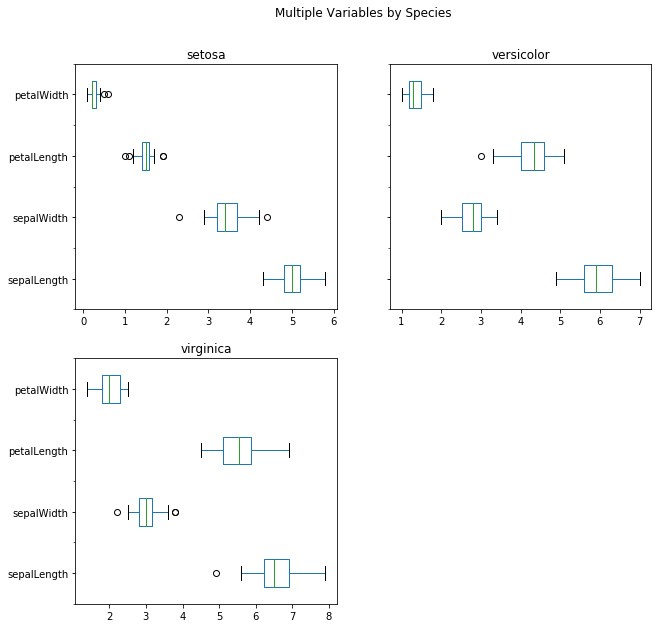

In [15]:
iris.groupby('species').boxplot(vert=False, grid=False)
plt.suptitle("Multiple Variables by Species")

The plots above make it difficult to compare the same metric distribution between species. So let's show the same metric by species side-by-side in the same plots.

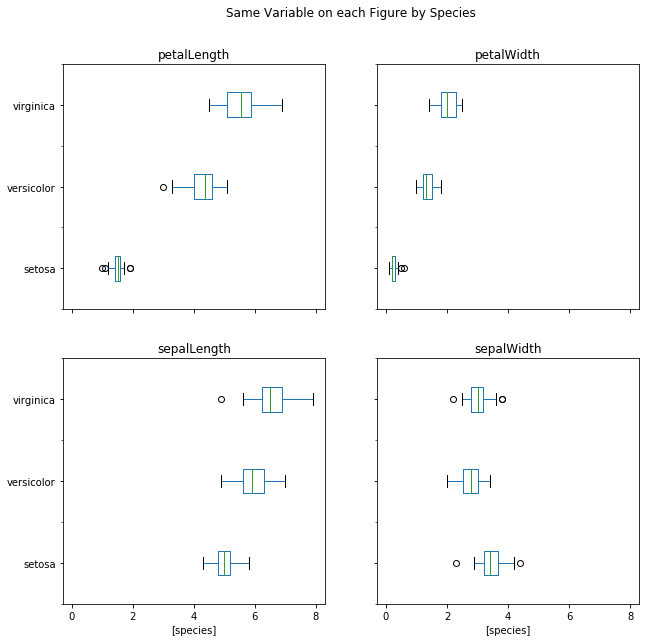

In [16]:
iris.boxplot(by=['species'], vert=False, grid=False)
plt.suptitle("Same Variable on each Figure by Species")

#### Bar Plots

Another way to compare a single numeric variable across some categorical variable is the bar plot.

Let's compare petalLength means between species.

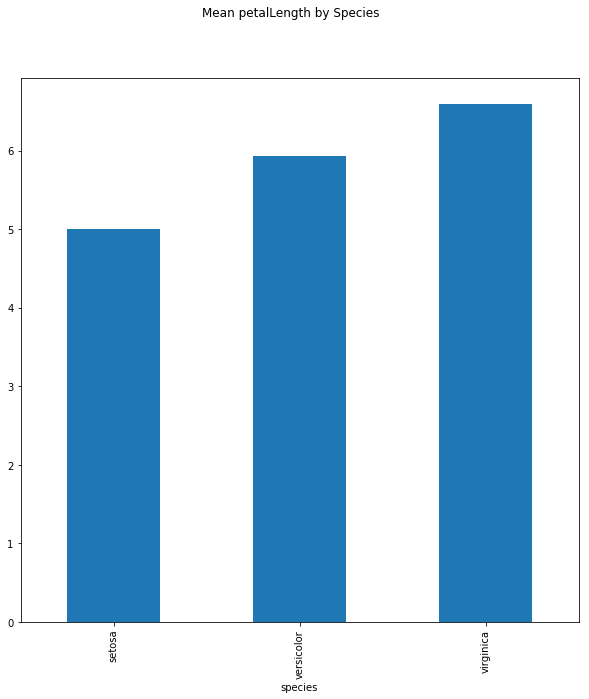

In [17]:
iris.groupby('species').sepalLength.mean().plot.bar()
plt.suptitle("Mean petalLength by Species")

Now let's compare all variable means by species.

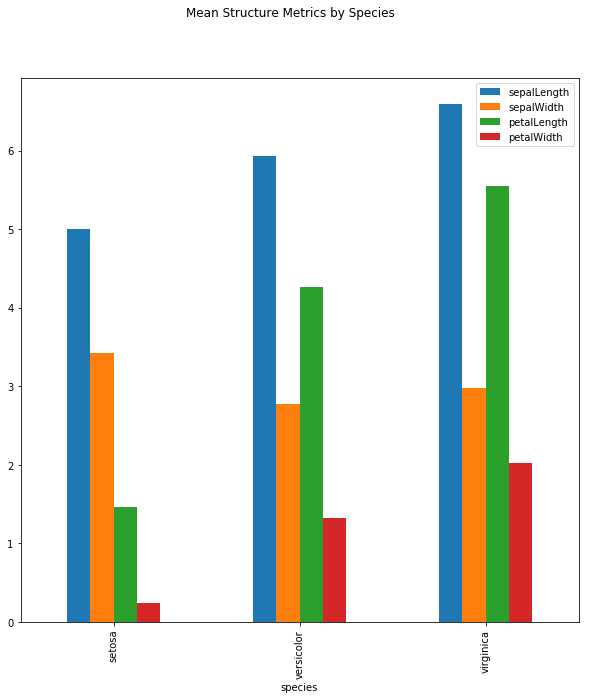

In [18]:
iris.groupby('species').mean().plot.bar()
plt.suptitle("Mean Structure Metrics by Species")

Bar plots can be oriented horizontally with the barh() method.

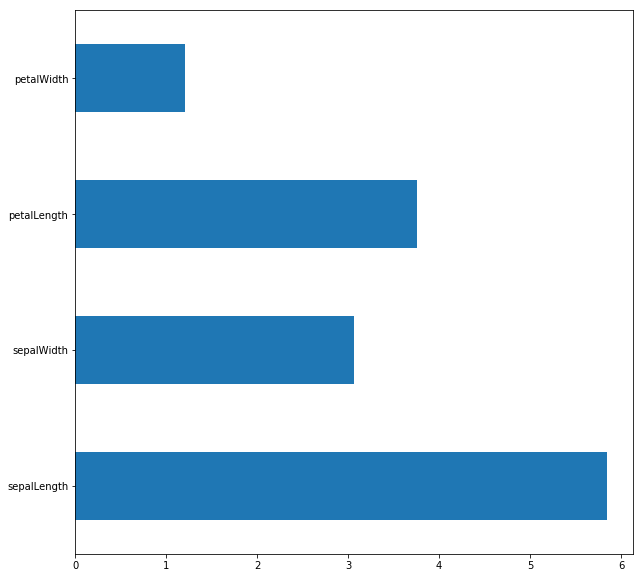

In [19]:
iris.mean().plot.barh()

### Multivariate Visualizations

Now we move on to visualizations that involve plotting variables against each other on seperate axes.

#### Scatter Plot

Let's begin with simple scatter plots.

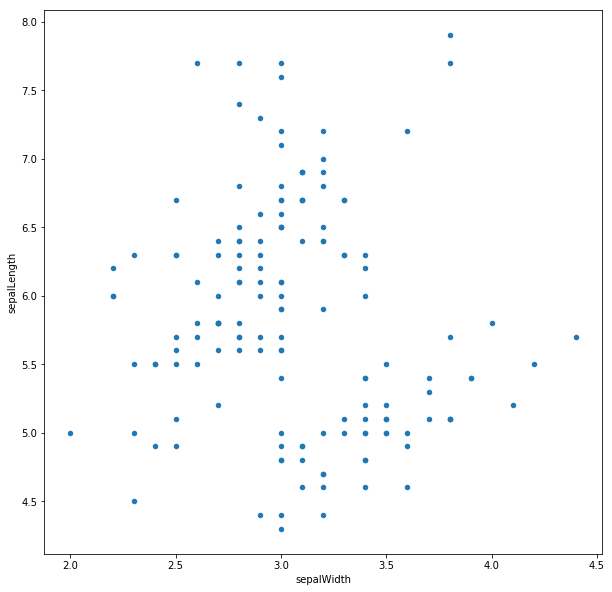

In [20]:
iris.plot.scatter(x='sepalWidth', y='sepalLength')

#### Bubble Plot

A third dimension can be added to change the size of the points to be proportional to that third dimension in a <b>bubble plot</b>.

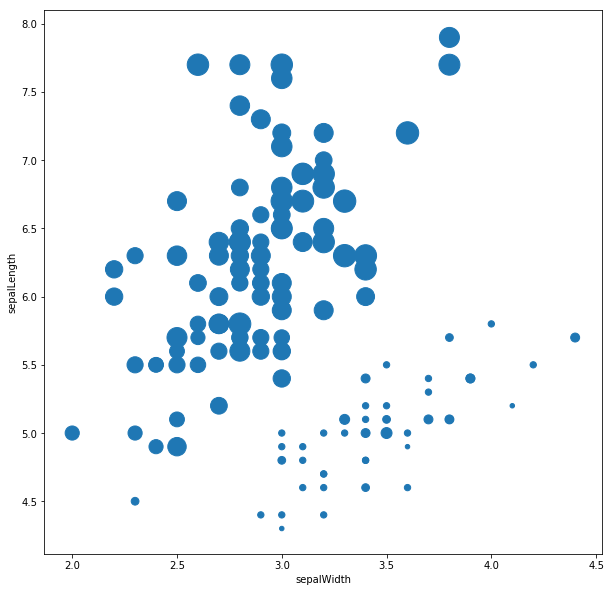

In [21]:
iris.plot.scatter(x='sepalWidth', y='sepalLength', s=iris['petalWidth']*200) # s is the size of the bubbles

Wouldn't it be nice if we could easily color the points by species? We're in luck. There is another module called <i>Seaborn</i> which has many easy and flexible graphic customization features. First we must import it into our current session. Fortunately, it is already installed with the Anaconda distribution.

In [22]:
import seaborn as sb

The <i>pairplot</i> method that you can learn more about at the seaborn help site: http://seaborn.pydata.org/generated/seaborn.pairplot.html

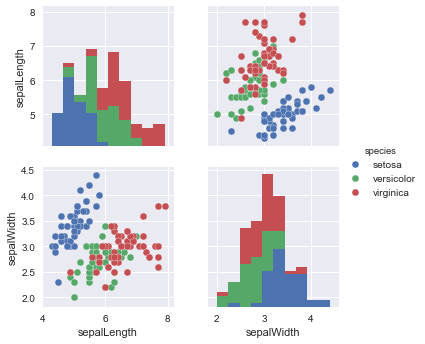

In [23]:
sb.pairplot(iris, vars=['sepalLength', 'sepalWidth'], hue="species")

You may have noticed that the above plot looks suspiciously like a scatter plot <b>matrix</b> or <b>SPLOM</b>. Well you are correct, that is exactly what it produces. Let's see what happens if we leave out the <i>vars</i> argument.

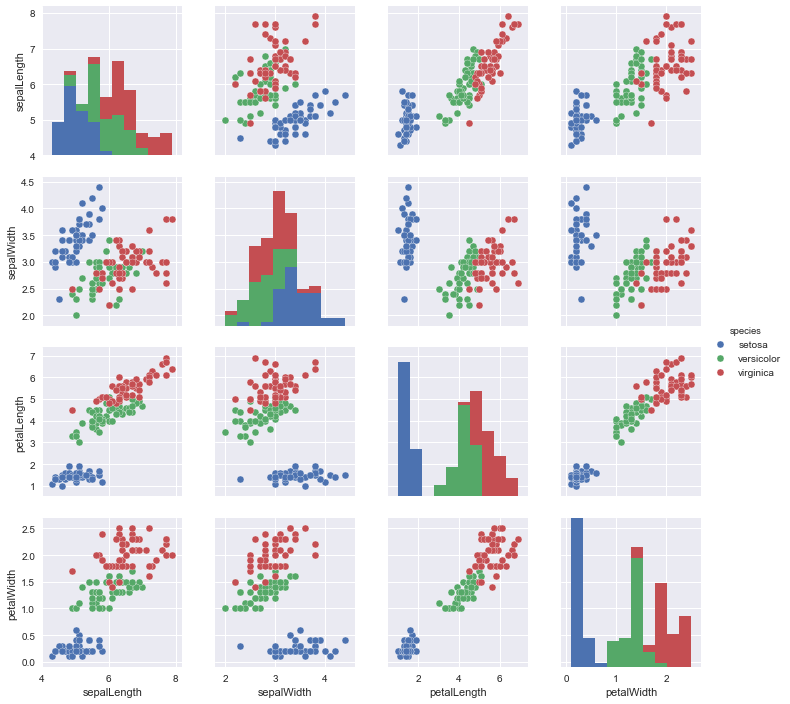

In [24]:
sb.pairplot(iris, hue="species")

Voila, a SPLOM of all numeric variables plotted against each other.

Another nice bivariate plot function, <i>jointplot</i>, shows the histograms of each variable on the margins of the figure.

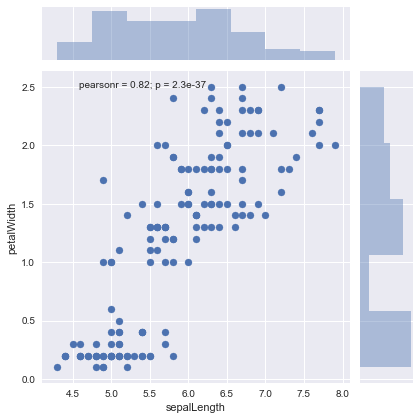

In [25]:
sb.jointplot(x='sepalLength', y='petalWidth', data=iris)

### Line Plot

The simplest of all plots is a single function. Let's see what a sine function looks like. First we need to populated the domain (x-axis). We can do that with the <b>numpy</b> function <i>linespace</i>.

In [26]:
import numpy as np

In [27]:
x = np.linspace(0, 10, 1000)

In [28]:
type(x)

numpy.ndarray

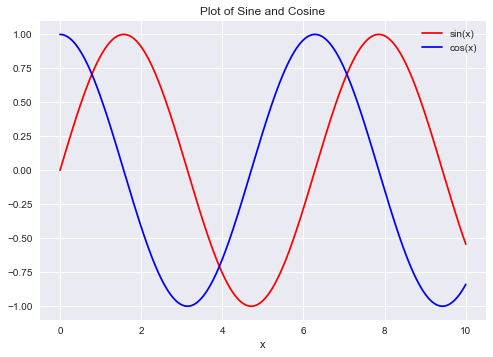

In [29]:
plt.plot(x, np.sin(x), color='red', label='sin(x)')
plt.plot(x, np.cos(x), color='blue', label='cos(x)')
plt.xlabel("x")
plt.legend()
plt.title("Plot of Sine and Cosine")

### Treemap

While pie charts were an amazing innovation in 1786 when William Playfair invented them, treemaps are a modern method that is far superior. Once you learn how to fine tune treemaps, you will never produce another worthless pie chart.

The module <b>squarify</b> produces treemaps but unfortunately it is not one of the modules distributed with Anaconda so we must first install it from PyPi. The easiest way to do that is to return to the console and enter 'pip install squarify' at the prompt. Once installed, you can return to the notebook and begin using it with the <i>import</i> statement.

In [30]:
import squarify as sq

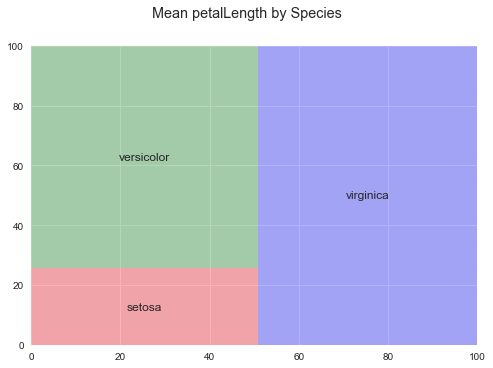

In [34]:
sz = iris.groupby('species').petalLength.mean().to_frame() # Convert a series to a dataframe
pd.DataFrame(sz).reset_index(inplace=True) # Convert the index "species' to a new column
sq.plot(sizes=sz['petalLength'], label=sz['species'], color=['red', 'green', 'blue'], alpha=.3 )
plt.suptitle("Mean petalLength by Species")